In [9]:
import pandas as pd

# Load the datasets
california_data = pd.read_csv('/Users/chadmutinda/Zahara/California copy.csv')
germany_data = pd.read_csv('/Users/chadmutinda/Zahara/Augsburg, Germany copy.csv')

# Display the first few rows of each dataset
print("California Data:")
print(california_data.head())

print("\nAugsburg, Germany Data:")
print(germany_data.head())


California Data:
        date  parameter    average
0  2018-01-01      PM10  14.827068
1  2018-01-01       NO2   0.013500
2  2018-01-01        CO   0.188992
3  2018-01-01        O3   0.023731
4  2018-02-01      PM10  15.913043

Augsburg, Germany Data:
        date  parameter    average
0  2018-01-01      PM10  14.268552
1  2018-01-01      PM25  10.262475
2  2018-01-01        O3  32.053733
3  2018-01-01       NO2  26.860442
4  2018-02-01      PM10  23.883824


In [12]:
# Checking for missing values and duplicates
print("Missing values in California data:")
print(california_data.isnull().sum())

print("\nMissing values in Augsburg, Germany data:")
print(germany_data.isnull().sum())

# Drop duplicates
california_data.drop_duplicates(inplace=True)
germany_data.drop_duplicates(inplace=True)

# Fill missing values in 'Average' column with the mean of their respective columns
california_data['average'].fillna(california_data['average'].mean(), inplace=True)
germany_data['average'].fillna(germany_data['average'].mean(), inplace=True)

# Verify data cleaning steps
print("Cleaned California Data:")
print(california_data.info())

print("\nCleaned Augsburg, Germany Data:")
print(germany_data.info())


Missing values in California data:
date         0
parameter    0
average      4
dtype: int64

Missing values in Augsburg, Germany data:
date         0
parameter    0
average      0
dtype: int64
Cleaned California Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       312 non-null    object 
 1   parameter  312 non-null    object 
 2   average    312 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.8+ KB
None

Cleaned Augsburg, Germany Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       312 non-null    object 
 1   parameter  312 non-null    object 
 2   average    312 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.8+ KB
None


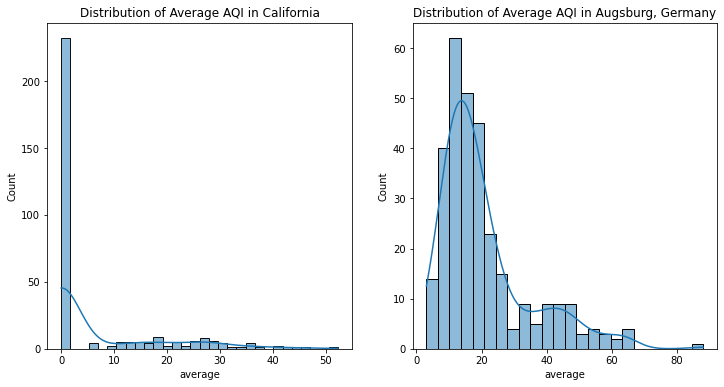

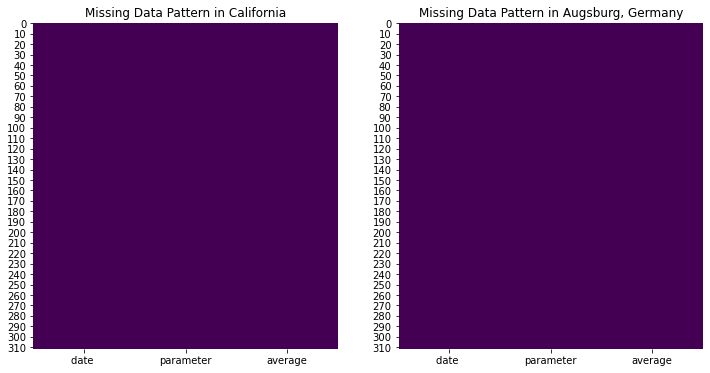

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Average' values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(california_data['average'], kde=True)
plt.title('Distribution of Average AQI in California')

plt.subplot(1, 2, 2)
sns.histplot(germany_data['average'], kde=True)
plt.title('Distribution of Average AQI in Augsburg, Germany')

plt.show()

# Missing data patterns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(california_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Pattern in California')

plt.subplot(1, 2, 2)
sns.heatmap(germany_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Pattern in Augsburg, Germany')

plt.show()


Summary Statistics for California Data:
          average
count  312.000000
mean     5.967941
std     11.265371
min      0.002685
25%      0.020554
50%      0.118148
75%      5.967941
max     52.324438

Summary Statistics for Augsburg, Germany Data:
          average
count  312.000000
mean    20.820831
std     13.924618
min      3.060629
25%     11.822351
50%     15.915063
75%     24.074463
max     88.019804

Average AQI in California: 5.967941280691554
Average AQI in Augsburg, Germany: 20.820831030070515


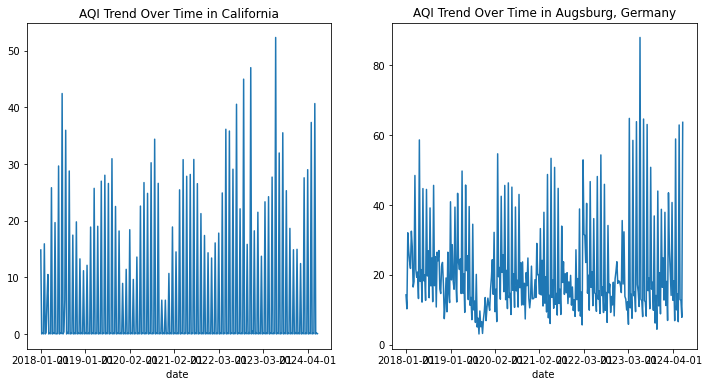

In [20]:
# Summary Statistics
print("Summary Statistics for California Data:")
print(california_data.describe())

print("\nSummary Statistics for Augsburg, Germany Data:")
print(germany_data.describe())

# Comparative Analysis: Average AQI
avg_aqi_california = california_data['average'].mean()
avg_aqi_germany = germany_data['average'].mean()

print(f"\nAverage AQI in California: {avg_aqi_california}")
print(f"Average AQI in Augsburg, Germany: {avg_aqi_germany}")

# Trend Analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
california_data.set_index('date ')['average'].plot()
plt.title('AQI Trend Over Time in California')

plt.subplot(1, 2, 2)
germany_data.set_index('date ')['average'].plot()
plt.title('AQI Trend Over Time in Augsburg, Germany')

plt.show()


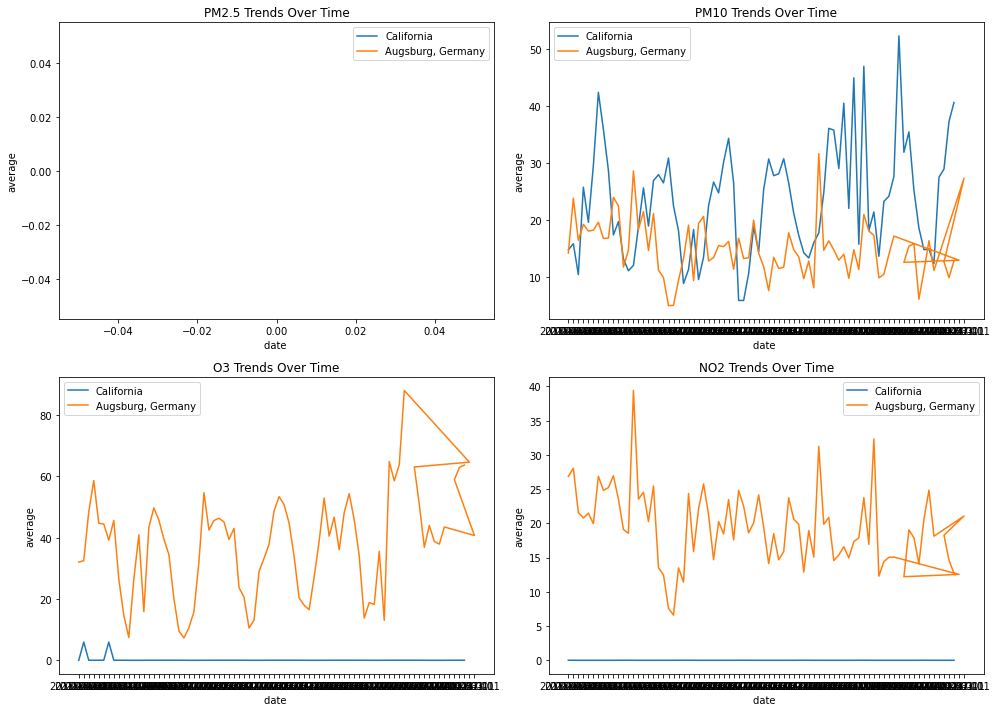

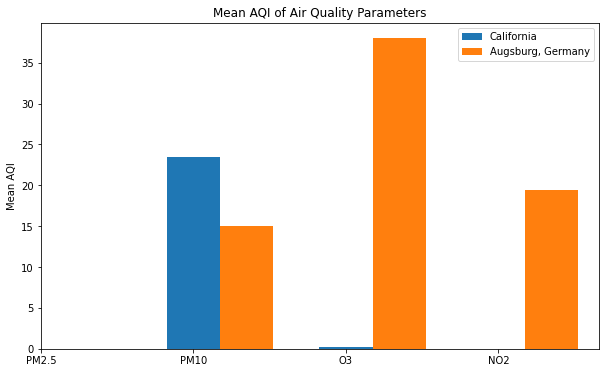

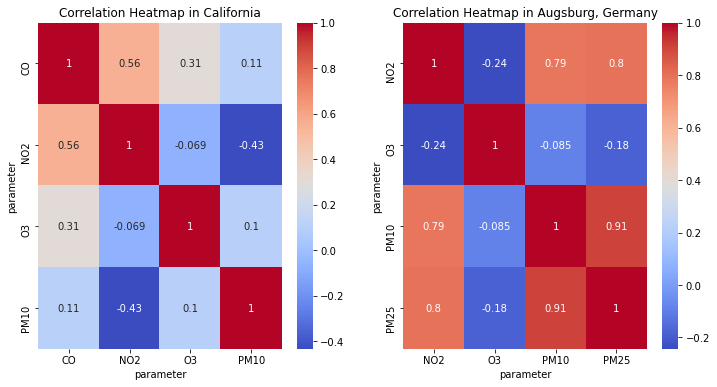

In [26]:
# Time Series Plots for Parameters
parameters = ['PM2.5', 'PM10', 'O3', 'NO2']

plt.figure(figsize=(14, 10))
for i, param in enumerate(parameters, 1):
    plt.subplot(2, 2, i)
    plt.plot(california_data[california_data['parameter'] == param]['date '],
             california_data[california_data['parameter'] == param]['average'], label='California')
    plt.plot(germany_data[germany_data['parameter'] == param]['date '],
             germany_data[germany_data['parameter'] == param]['average'], label='Augsburg, Germany')
    plt.title(f'{param} Trends Over Time')
    plt.xlabel('date ')
    plt.ylabel('average')
    plt.legend()

plt.tight_layout()
plt.show()

# Comparative Bar Charts
plt.figure(figsize=(10, 6))
ind = range(len(parameters))
width = 0.35

california_means = [california_data[california_data['parameter'] == param]['average'].mean() for param in parameters]
germany_means = [germany_data[germany_data['parameter'] == param]['average'].mean() for param in parameters]

plt.bar(ind, california_means, width, label='California')
plt.bar([i + width for i in ind], germany_means, width, label='Augsburg, Germany')

plt.ylabel('Mean AQI')
plt.title('Mean AQI of Air Quality Parameters')
plt.xticks(ind, parameters)
plt.legend()

plt.show()

# Heatmaps of Correlation between Parameters
california_pivot = california_data.pivot_table(index='date ', columns='parameter', values='average')
germany_pivot = germany_data.pivot_table(index='date ', columns='parameter', values='average')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(california_pivot.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap in California')

plt.subplot(1, 2, 2)
sns.heatmap(germany_pivot.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap in Augsburg, Germany')

plt.show()
